In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting visual style
sns.set(style="whitegrid")

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/RFLFSODataFull.csv')

In [ ]:
data

,FSO_Att,RFL_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,...,TemperatureMax,TemperatureMin,Time,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin
0,7.913289,6.927868,17.595709,17.615907,17.340148,2115.338398,83500000000,0.000000,0.000000,0.000000,...,26.603030,24.680849,9,65884.518460,72336.362233,65617.543754,88.755450,3.057066,6.863808,3.007939
1,7.451176,4.412096,17.549693,17.572415,17.299439,2113.999257,73500000000,0.000000,0.000000,0.000000,...,26.377164,24.313108,9,64963.410920,68753.386153,60379.327485,99.790057,2.727910,6.468903,2.537393
2,7.072747,6.268740,17.290230,17.644014,16.037894,2118.689047,83500000000,0.000000,0.000000,0.000000,...,27.670822,23.150277,10,54794.281070,54821.773817,50850.155963,65.730085,1.674810,2.826916,1.640809
3,6.949288,4.317853,16.820880,17.066776,15.895622,2114.632339,73500000000,0.000000,0.000000,0.000000,...,26.522100,23.174815,10,50205.641590,52519.927530,45374.510898,88.127497,0.962068,2.780643,0.886951
4,7.361052,6.114514,16.813820,17.953974,15.227225,2116.786055,83500000000,0.000000,0.000000,0.000000,...,26.305736,24.864100,10,59038.325990,64418.329138,54461.246506,84.167414,1.881007,4.476298,1.874052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91374,9.150012,11.968291,23.283256,24.142871,22.169805,3970.846129,83500000000,0.000000,0.000000,0.000000,...,27.257926,26.013205,4,13041.847800,13458.340663,12411.852994,91.391749,0.000000,0.027596,0.000000
91375,9.333777,11.538030,23.259618,25.104895,21.005496,3969.230652,73500000000,0.000000,0.000000,0.000000,...,28.101044,25.032282,4,15959.633590,16232.735439,15345.485232,47.997946,0.075640,0.349551,0.069834
91376,8.873168,11.491891,23.331697,23.996130,22.148649,3968.373512,83500000000,0.000000,0.000000,0.000000,...,28.249678,26.205773,4,13129.663750,13948.560177,11925.979953,103.963102,0.052282,0.178062,0.049824
91377,9.538886,11.526529,21.241027,21.624932,20.736391,3967.550165,73500000000,29.693160,30.761540,28.497137,...,26.880084,25.031934,5,15082.787860,15522.762221,14842.654291,82.090779,0.443520,1.838449,0.413146


# Data cleaning
1. Handling missing values

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 FSO_Att                  0
RFL_Att                  0
AbsoluteHumidity         0
AbsoluteHumidityMax      0
AbsoluteHumidityMin      0
Distance                 0
Frequency                0
Particulate              0
ParticulateMax           0
ParticulateMin           0
RainIntensity            0
RainIntensityMax         0
RainIntensityMin         0
RelativeHumidity         0
SYNOPCode                0
Temperature              0
TemperatureDifference    0
TemperatureMax           0
TemperatureMin           0
Time                     0
Visibility               0
VisibilityMax            0
VisibilityMin            0
WindDirection            0
WindSpeed                0
WindSpeedMax             0
WindSpeedMin             0
dtype: int64


Since there is no missing values going to the next step

2. check any invalid values

In [ ]:
# Define the valid SYNOP codes
valid_synop_codes = [0, 3, 4, 5, 6, 7, 8]

# Check for invalid SYNOP codes
invalid_synop_codes = data[~data['SYNOPCode'].isin(valid_synop_codes)]

# Print the rows with invalid SYNOP codes
if not invalid_synop_codes.empty:
    print("Rows with invalid SYNOP codes:\n", invalid_synop_codes)
else:
    print("All SYNOPCode values are valid.")

All SYNOPCode values are valid.


In [ ]:
# Check if all columns contain numeric values
non_numeric_columns = data.columns[~data.map(lambda x: isinstance(x, (int, float))).all()]

# Print the result
if len(non_numeric_columns) == 0:
    print("All columns contain numeric values.")
else:
    print("Columns with non-numeric values:\n", non_numeric_columns)


All columns contain numeric values.


3. duplicate rows

In [ ]:
# Check for duplicates
duplicates = data.duplicated()

# Print the number of duplicate rows found
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


EDA

In [ ]:
# Display the statistical summary
print(data.describe())


            FSO_Att       RFL_Att  AbsoluteHumidity  AbsoluteHumidityMax  \
count  91379.000000  91379.000000      91379.000000         91379.000000   
mean       6.769458     11.619098          9.553919            10.032760   
std        3.903843      3.438873          5.858577             6.162798   
min        0.788363      0.027142          1.141556             1.238270   
25%        3.473063     10.829331          4.958993             5.205861   
50%        6.336167     11.856560          6.870737             7.205499   
75%        8.664984     12.847944         14.049470            14.782679   
max       32.455222     46.893150         24.790883            26.407305   

       AbsoluteHumidityMin      Distance     Frequency   Particulate  \
count         91379.000000  91379.000000  9.137900e+04  91379.000000   
mean              9.076251   3297.930328  7.850005e+10     27.065979   
std               5.575927   1224.305893  5.000027e+09     72.134023   
min               1.049744 

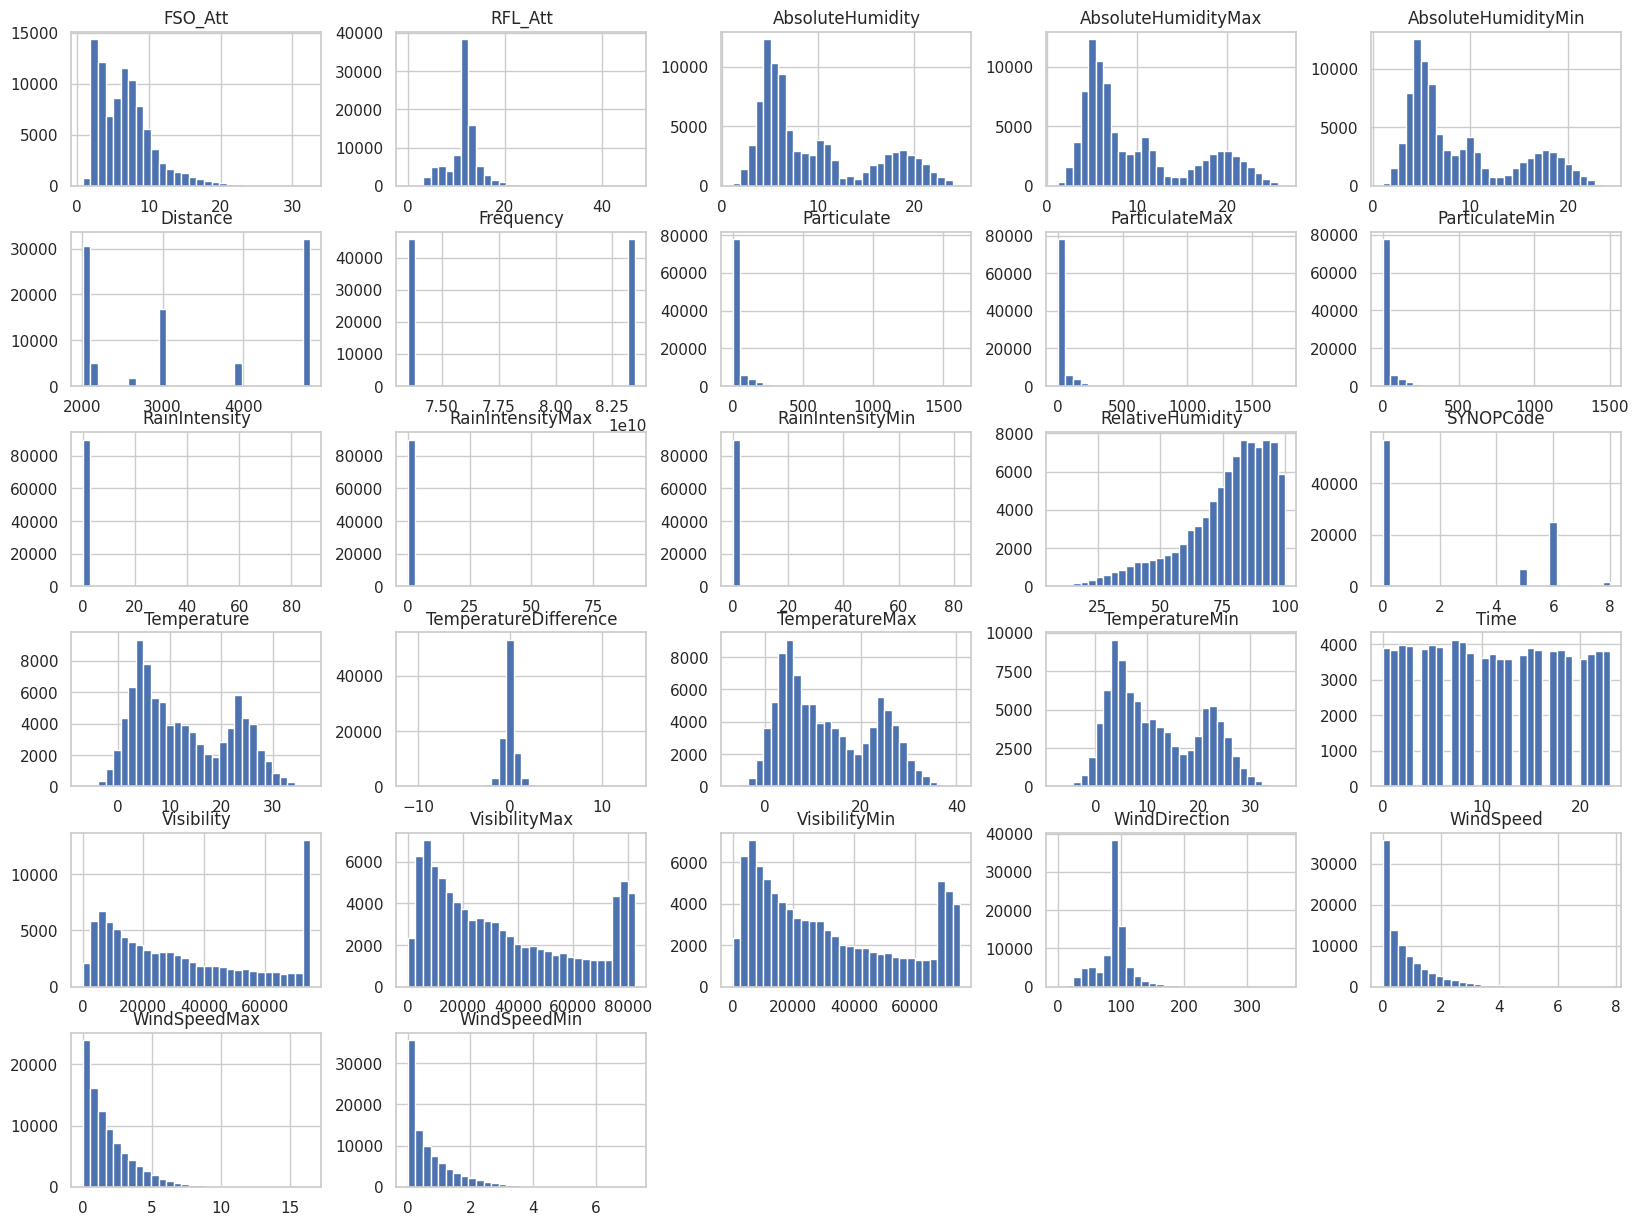

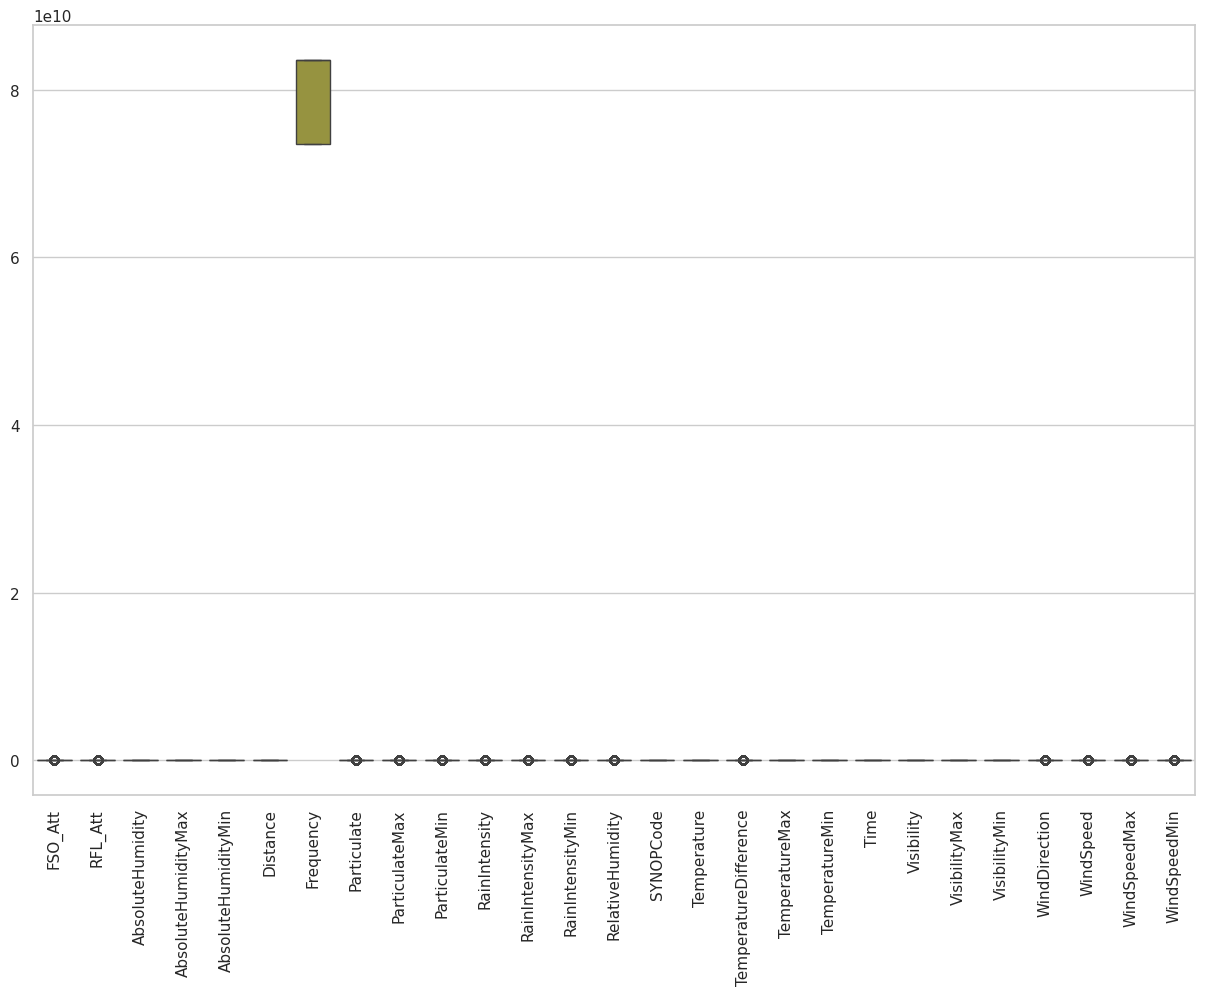

In [ ]:
# Histograms
data.hist(bins=30, figsize=(20,15))
plt.show()

# Boxplots to check for outliers
plt.figure(figsize=(15,10))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

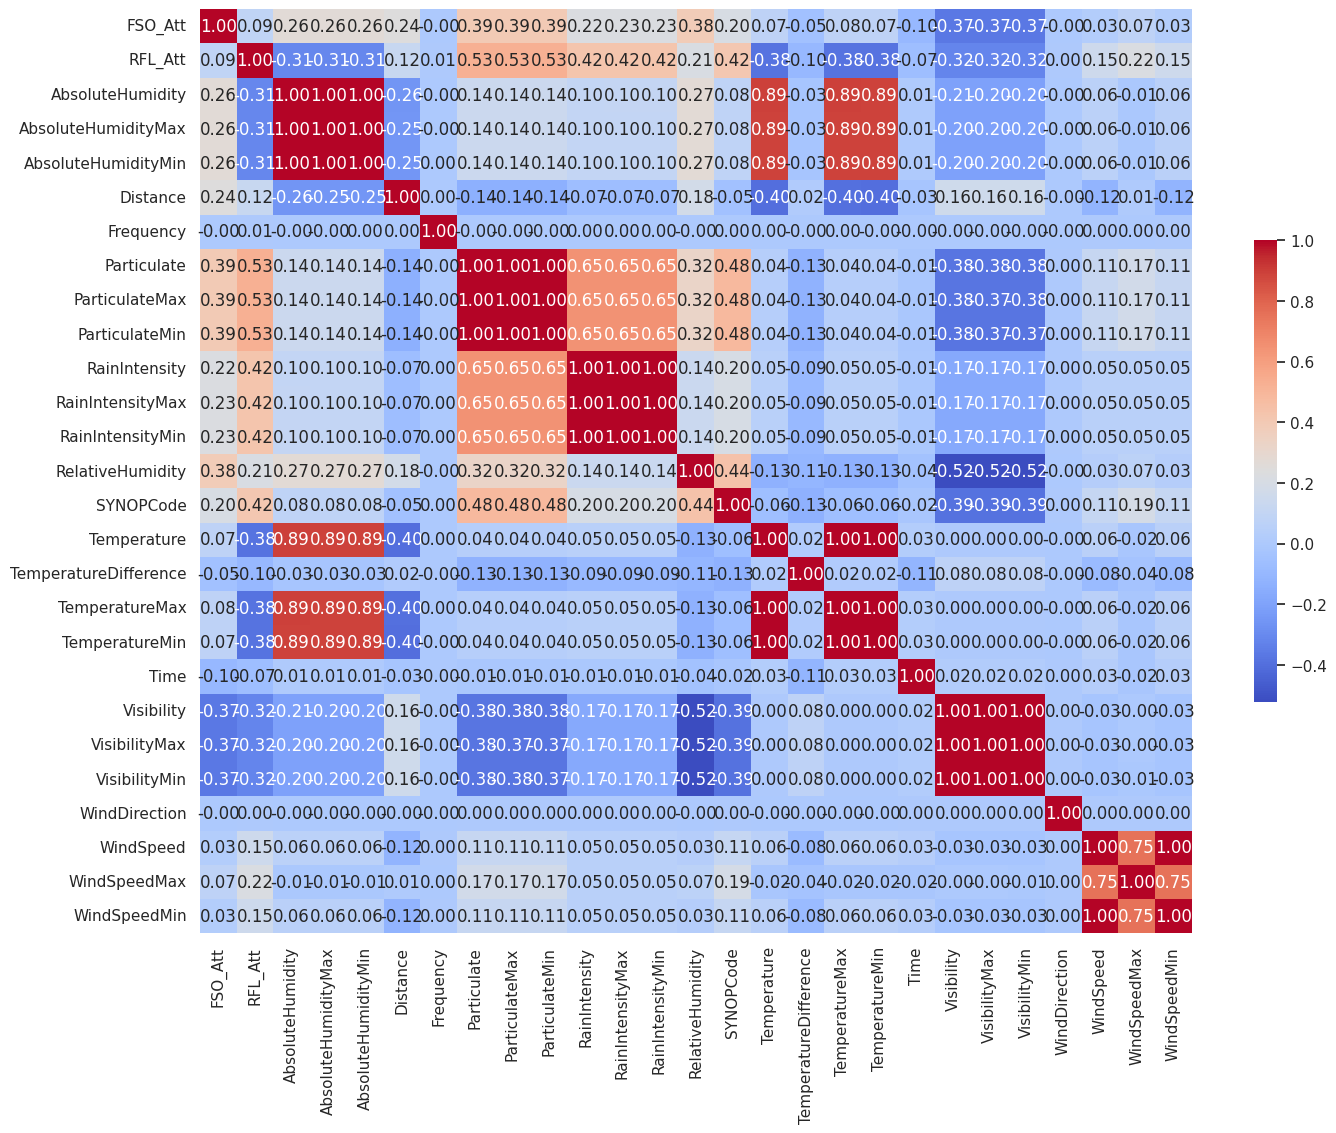

In [ ]:
# Calculate correlation matrix
correlation_matrix = data.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'shrink': 0.5})
plt.show()